## Unsupervised Learning

by Atmam Al Faruq

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [9]:
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

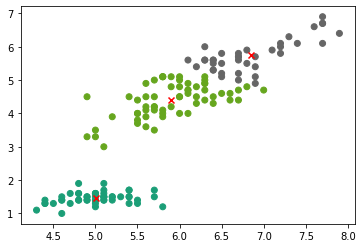

In [40]:
import matplotlib.pyplot as plt

centroid = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,2],c=kmeans.labels_,cmap='Dark2')
plt.scatter(centroid[:,0],centroid[:,2],marker='x',color='r')

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(Y,kmeans.labels_))
print(classification_report(Y,kmeans.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



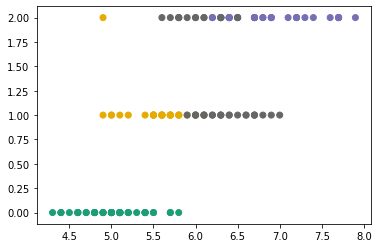

In [67]:
K = 4
kmeans_v2 = KMeans(n_clusters=K)
kmeans_v2.fit(X)

plt.scatter(X[:,0],Y,c=kmeans_v2.labels_,cmap='Dark2')

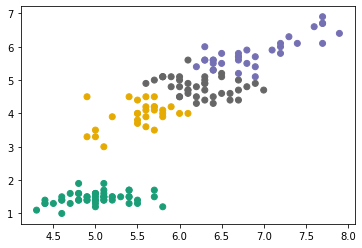

In [75]:
plt.scatter(X[:,0],X[:,2],c=kmeans_v2.labels_,cmap='Dark2')

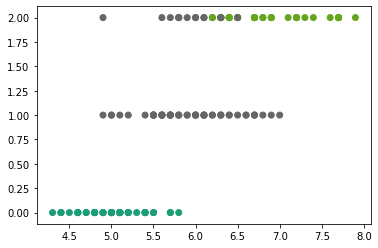

In [73]:
three_classes = []

for i in kmeans_v2.labels_:
    if i == 3:
        three_classes.append(2)
    else:
        three_classes.append(i)
        
plt.scatter(X[:,0],Y,c=three_classes,cmap='Dark2')

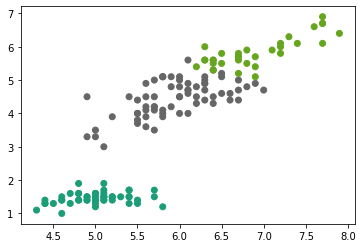

In [76]:
plt.scatter(X[:,0],X[:,2],c=three_classes,cmap='Dark2')

In [94]:
import numpy as np

Y_new = np.concatenate([np.repeat(0,50),np.repeat(2,50),np.repeat(1,50)])

print(confusion_matrix(Y_new,three_classes))
print(classification_report(Y_new,three_classes))

[[50  0  0]
 [ 0 32 18]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.64      0.78        50
           2       0.74      1.00      0.85        50

    accuracy                           0.88       150
   macro avg       0.91      0.88      0.88       150
weighted avg       0.91      0.88      0.88       150



## Hierarchical

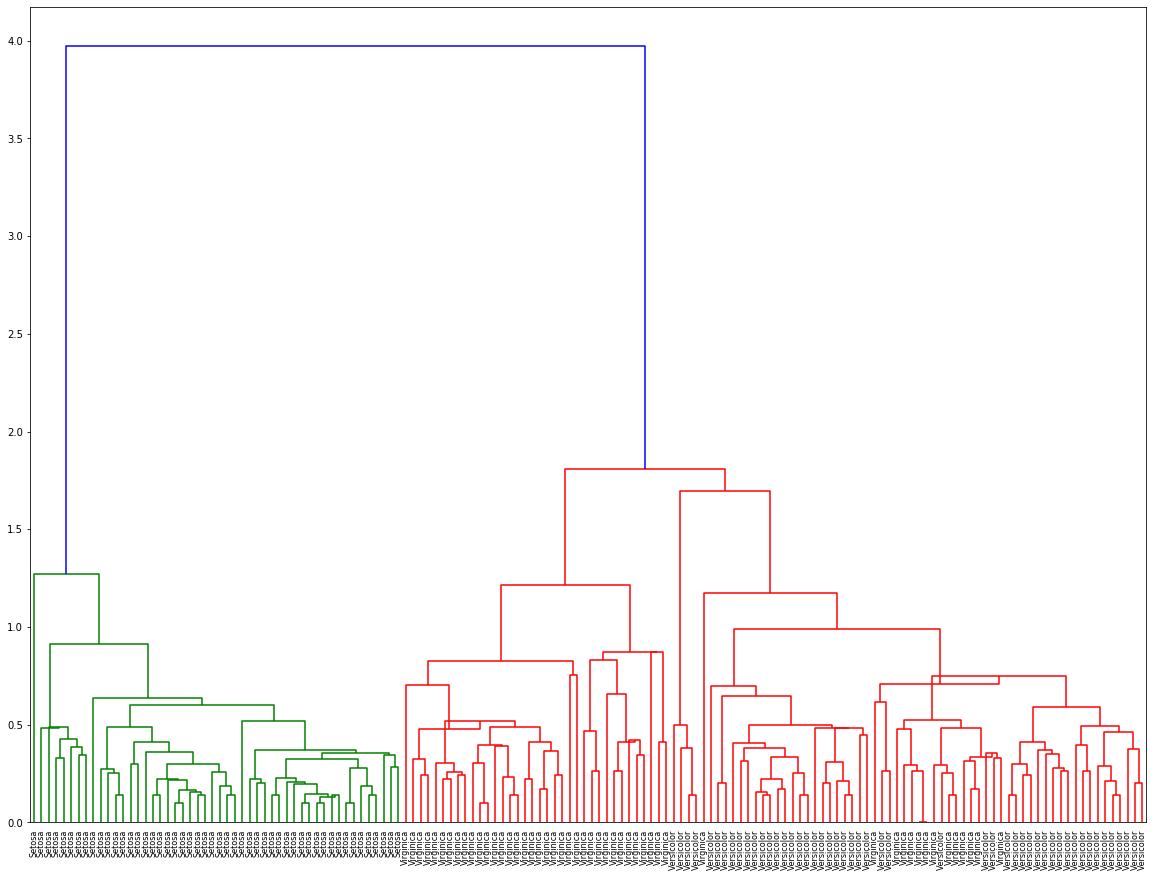

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram

species = []

for i in iris.target:
    if i == 0:
        species.append('Setosa')
    elif i == 1:
        species.append('Versicolor')
    elif i == 2:
        species.append('Virginica')

merge = linkage(X, method='centroid')

plt.subplots(figsize=(20,15))
dendrogram(merge,labels=species,leaf_rotation=90,leaf_font_size=8,)
plt.show()

## TSne

In [61]:
from sklearn.manifold import TSNE

model_tsne = TSNE(learning_rate=100)

fit_model = model_tsne.fit_transform(iris.data)

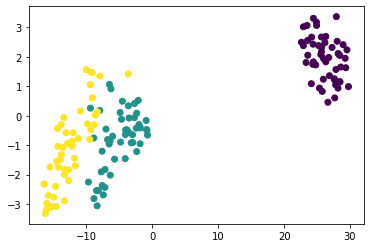

In [64]:
x_axis = fit_model[:,0]
y_axis = fit_model[:,1]

plt.scatter(x_axis, y_axis, c=iris.target)

## Principal Component Analysis (PCA)

In [99]:
import pandas as pd

iris_df = pd.DataFrame(data=X,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(X)

std_df = pd.DataFrame(data=x_std,columns=iris.feature_names)
std_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pc = pca.fit_transform(x_std)
principal_df = pd.DataFrame(data = pc, columns = ['pc 1', 'pc 2'])

principal_df.head()

,pc 1,pc 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [105]:
K = 3
kmeans_pca = KMeans(n_clusters=K)
kmeans_pca.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

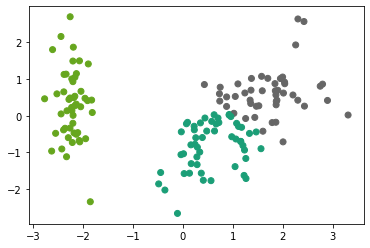

In [108]:
plt.scatter(pc[:,0],pc[:,1],c=kmeans_pca.labels_,cmap='Dark2')

In [111]:
Y_pc = np.concatenate([np.repeat(1,50),np.repeat(0,50),np.repeat(2,50)])

print(confusion_matrix(Y_pc,kmeans_pca.labels_))
print(classification_report(Y_pc,kmeans_pca.labels_))

[[39  0 11]
 [ 0 50  0]
 [14  0 36]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        50
           1       1.00      1.00      1.00        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

